In [608]:
import pandas as pd
import numpy as np

In [609]:
df = pd.read_csv("spam.csv", encoding="latin-1")

In [610]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [611]:
df.shape

(5572, 5)

#### 1. Data cleaning
#### 2. EDA
#### 3. Text Preprocessing
#### 4. Model building
#### 5. Evaluation
#### 6. Improvement
#### 7. Website
#### 8. Deploy

## 1. Data cleaning

In [612]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [613]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [614]:
## IN Unnamed 2, 3, 4 there is lots of nun values so we can drop it
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [615]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [616]:
## renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [617]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [618]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [619]:
# lable 0 --> ham, 1 ---> spam
df['target'] = encoder.fit_transform(df['target'])

In [620]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [621]:
## missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [622]:
## Check duplicate values
df.duplicated().sum()

np.int64(403)

In [623]:
df.shape

(5572, 2)

In [624]:
## drop duplicate values
df = df.drop_duplicates(keep="first")

In [625]:
df.shape

(5169, 2)

In [626]:
## Check duplicate values
df.duplicated().sum()

np.int64(0)

## 2. Eda

In [627]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

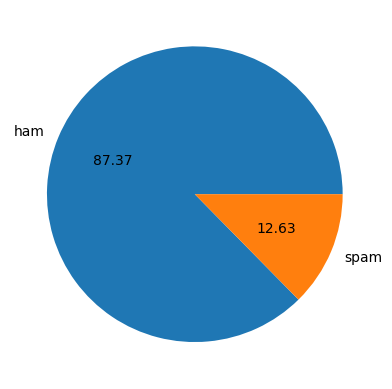

In [628]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct= '%0.2f')
plt.show()

In [629]:
## Our data is imbalanced

In [630]:
import nltk

In [631]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/priyanshuyadav/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [632]:
## count number of text in per message and show in num_characters
df['num_characters'] = df['text'].apply(len)

In [633]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [634]:
## num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [635]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [636]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [637]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [638]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [639]:
# ham data describe
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [640]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [641]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

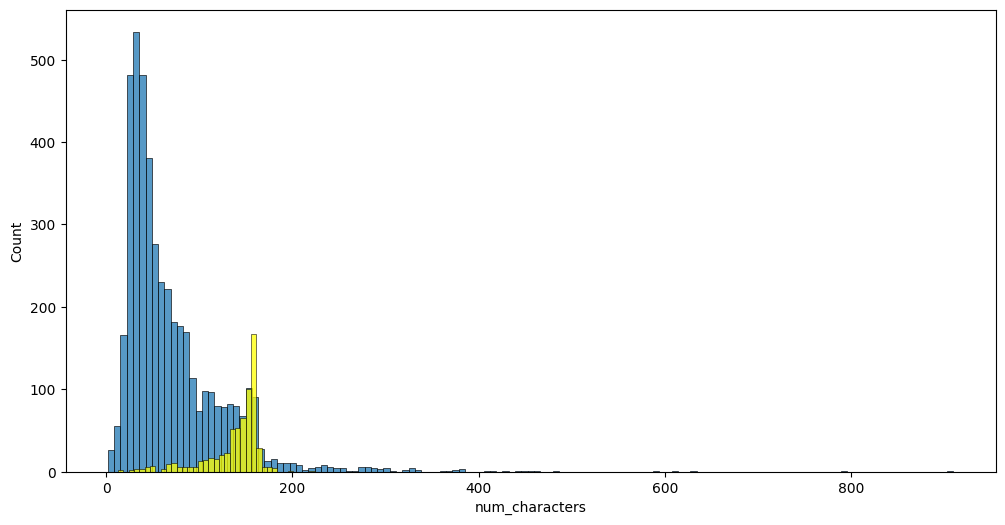

In [642]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='yellow')

<Axes: xlabel='num_words', ylabel='Count'>

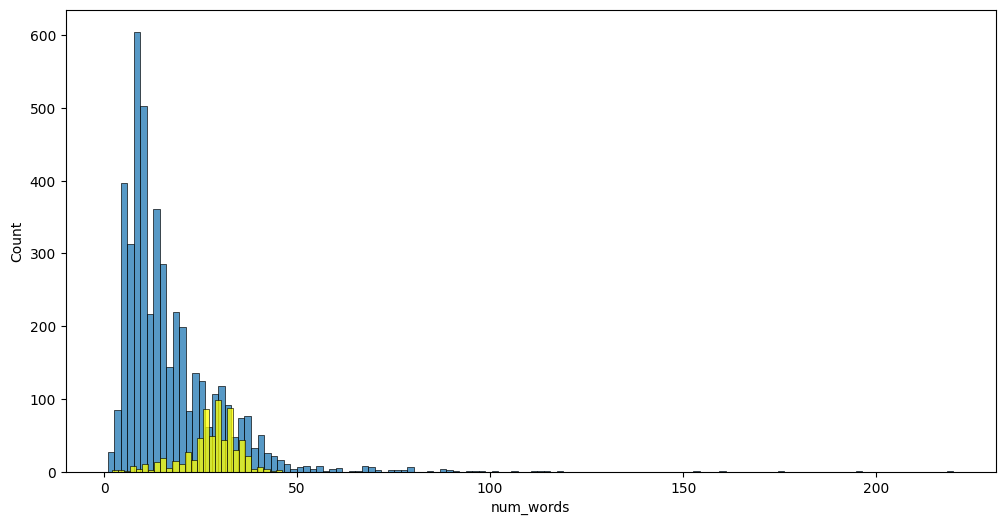

In [643]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='yellow')
## 0 --> ham,  1 --> spam

/opt/homebrew/Caskroom/miniforge/base/envs/ml_global/lib/python3.11/site-packages/scipy/_lib/_util.py:1280: RuntimeWarning: divide by zero encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/opt/homebrew/Caskroom/miniforge/base/envs/ml_global/lib/python3.11/site-packages/scipy/_lib/_util.py:1280: RuntimeWarning: overflow encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/opt/homebrew/Caskroom/miniforge/base/envs/ml_global/lib/python3.11/site-packages/scipy/_lib/_util.py:1280: RuntimeWarning: invalid value encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/opt/homebrew/Caskroom/miniforge/base/envs/ml_global/lib/python3.11/site-packages/scipy/_lib/_util.py:1280: RuntimeWarning: divide by zero encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/opt/homebrew/Caskroom/miniforge/base/envs/ml_global/lib/python3.11/site-packages/scipy/_lib/_util.py:1280: RuntimeWarning: overflow encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/opt/homebrew/Cask

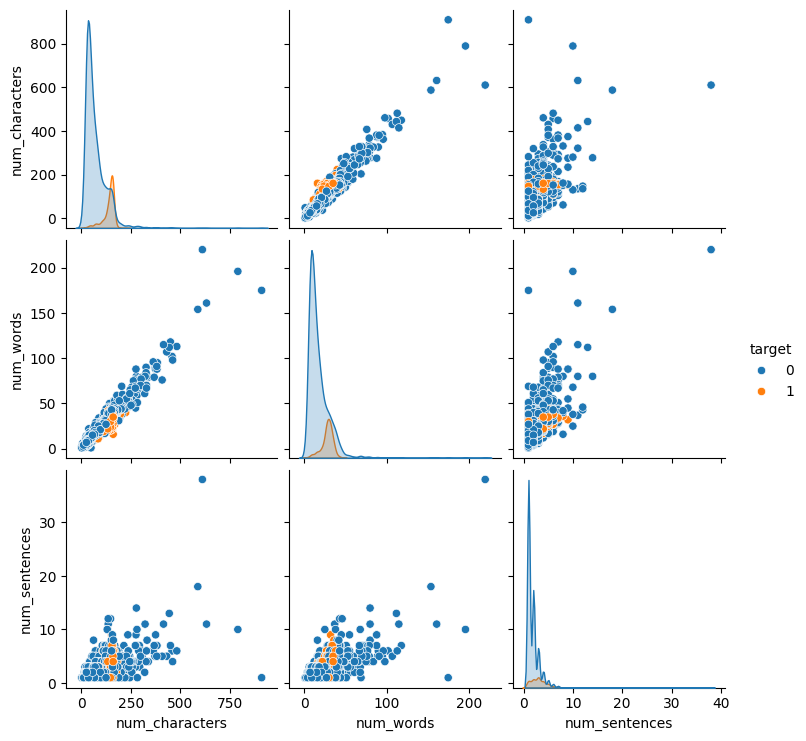

In [644]:
sns.pairplot(df,hue='target')

<Axes: >

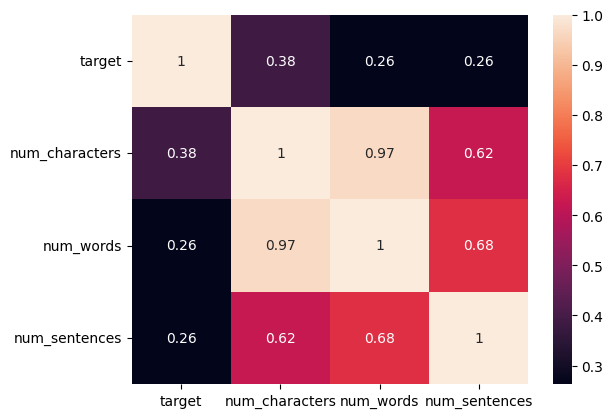

In [645]:
sns.heatmap(df[['target','num_characters','num_words','num_sentences']].corr(),annot=True)

### 3. Data Preprocessing
* Lower case
* Tokenization
* Remove special characters
* Remove stop words and punctuation
* stemming

In [646]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

def transform_text(text):
    """
    This function:
    1. Converts text to lowercase
    2. Tokenizes the text
    3. Removes punctuation & special characters
    4. Removes English stopwords
    5. Applies Snowball stemming
    6. Returns a cleaned string (ready for ML models)
    """

    # Convert to lowercase
    text = text.lower()

    # Tokenize text
    tokens = nltk.word_tokenize(text)

    # Load stopwords and stemmer
    stop_words = set(stopwords.words('english'))
    stemmer = SnowballStemmer('english')

    cleaned_words = []

    for word in tokens:
        # Keep only alphanumeric words
        if word.isalnum():
            # Remove stopwords
            if word not in stop_words:
                # Apply Snowball stemming
                cleaned_words.append(stemmer.stem(word))

    # Convert list of words to a single string
    return " ".join(cleaned_words)

In [647]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [648]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [649]:
df['transformed_text']=df['text'].apply(transform_text)

In [650]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [655]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [662]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

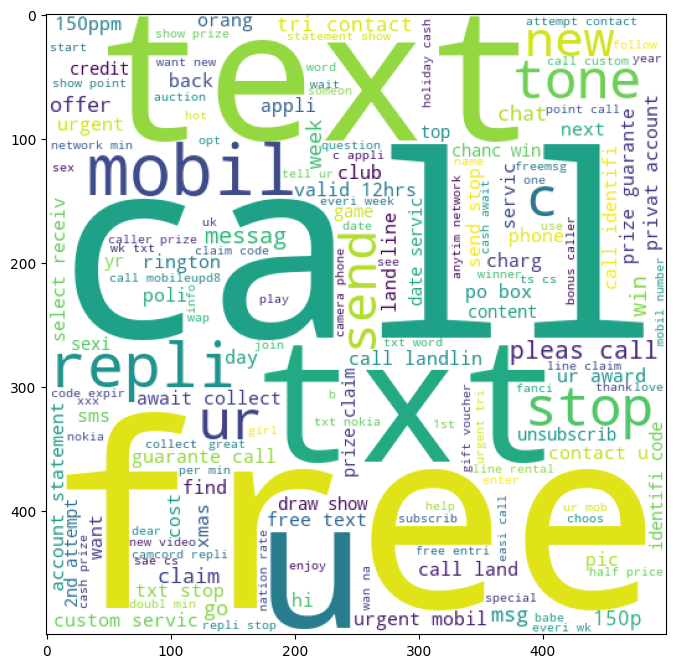

In [672]:
plt.figure(figsize=(8,11))
plt.imshow(spam_wc) ## most fequent words use in spam

In [673]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

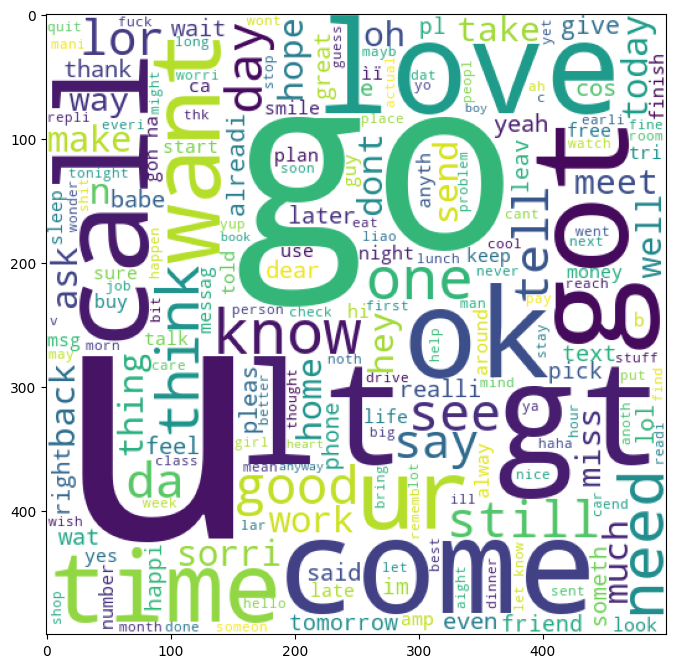

In [674]:
plt.figure(figsize=(8,11))
plt.imshow(ham_wc) ## most fequent words use in ham